In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# from importlib import reload
import curses  ####  pip install windows-curses
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import specsanalyzer
from specsanalyzer import SpecsAnalyzer

In [8]:
# reload(specsanalyzer)
spa = SpecsAnalyzer()

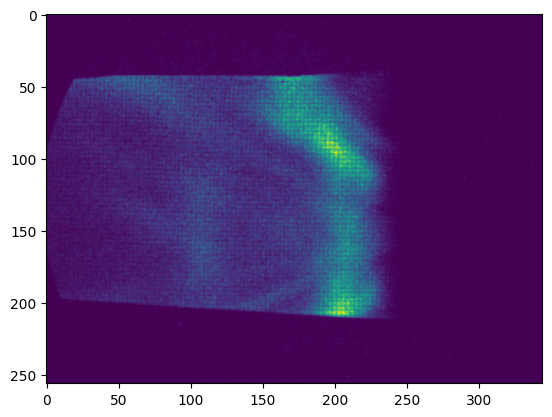

In [9]:
with open("../tests/data/dataEPFL/R9132/Data9132_RAWDATA.tsv") as file:
    tsv_data = np.loadtxt(file, delimiter="\t")
plt.figure()
plt.imshow(tsv_data)

(256, 344)

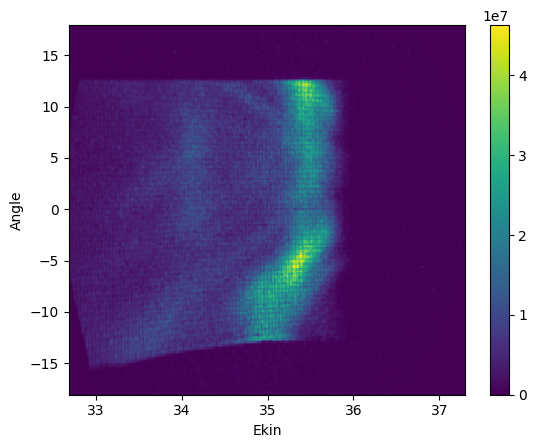

In [10]:
# Testing convert and crop on the imported data
spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")

lens_mode = "WideAngleMode"
kinetic_energy = 35.0
pass_energy = 35.0
work_function = 4.2

res_xarray = spa.convert_image(
    tsv_data, lens_mode, kinetic_energy, pass_energy, work_function
)
plt.figure()
res_xarray.plot(cmap="viridis", vmin=0)
res_xarray.to_numpy().shape

In [11]:
with open("../tests/data/dataEPFL/R9132/Data9132_IGOR_corrected.tsv") as file:
    ref_data = np.loadtxt(file, delimiter="\t")
    ref_data = ref_data

import specsanalyzer.convert
from specsanalyzer.convert import get_damatrix_fromcalib2d
from specsanalyzer.convert import get_rr_da
from specsanalyzer.convert import calculate_polynomial_coef_da
from specsanalyzer.convert import mcp_position_mm
from specsanalyzer.convert import calculate_matrix_correction

spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")
config_dict = spa.config
lens_mode = "WideAngleMode"
kinetic_energy = 35
pass_energy = 35
work_function = 4.3
binning = 4

(
    ek_axis,
    angle_axis,
    angular_correction_matrix,
    e_correction,
    jacobian_determinant,
) = calculate_matrix_correction(
    lens_mode,
    kinetic_energy,
    pass_energy,
    work_function,
    binning,
    config_dict,
)

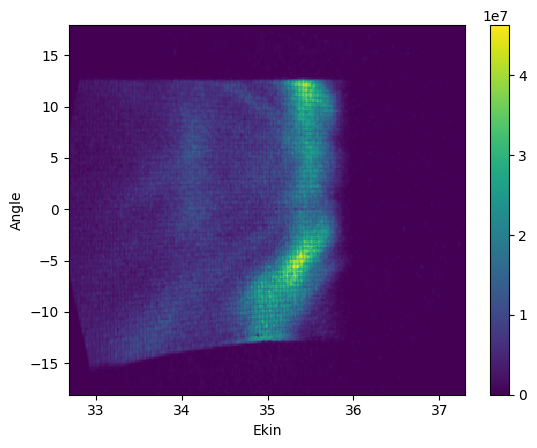

In [12]:
# this test would not work in the case of upsampling in python..


ref_xarray = xr.DataArray(
    data=ref_data,
    coords={"Angle": angle_axis, "Ekin": ek_axis},
    dims=["Angle", "Ekin"],
)
plt.figure()
ref_xarray.plot()

In [13]:
# calcualte the difference xarray, normalized to the ref pixelwise intensity
ff_xarray = (res_xarray - ref_xarray) / ref_xarray

Text(0.5, 1.0, 'Difference/Mean pixel intensity')

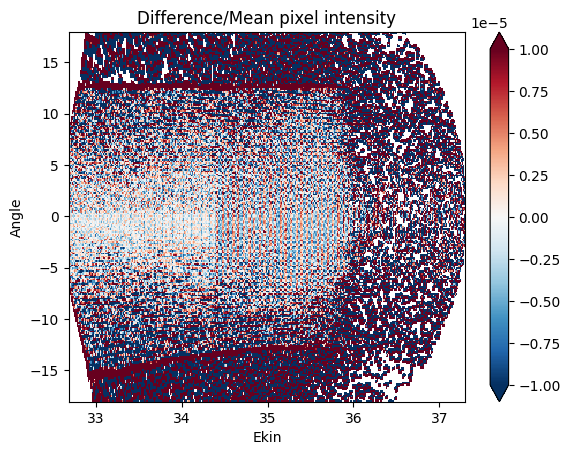

In [14]:
plt.figure()
ff_xarray.plot(cmap="RdBu_r", vmax=1e-5)
plt.title("Difference/Mean pixel intensity")

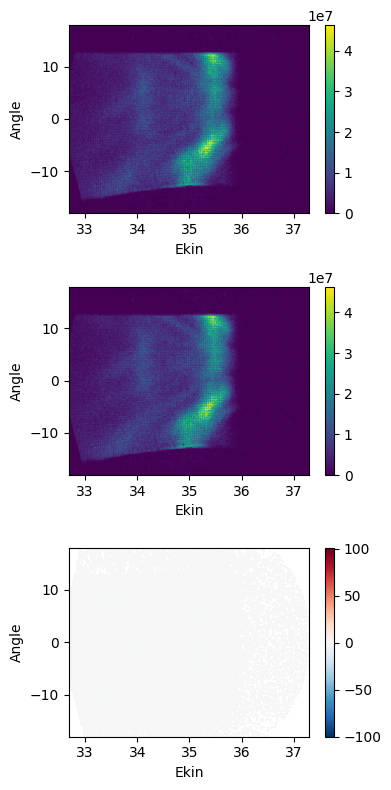

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(4, 8))
subplot1 = ref_xarray.plot(ax=ax1, cmap="viridis", vmin=0)
subplot2 = res_xarray.plot(ax=ax2, cmap="viridis", vmin=0)
subplot3 = ff_xarray.plot(cmap="RdBu_r", ax=ax3, vmax=100)
plt.tight_layout()

In [16]:
%timeit res_xarray = spa.convert_image(tsv_data, lens_mode, kinetic_energy, pass_energy, work_function)

4.81 ms ± 81.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%%timeit
convert1 = specsanalyzer.convert.physical_unit_data(
    tsv_data,
    angular_correction_matrix,
    e_correction,
    jacobian_determinant,
)

4.4 ms ± 63.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
config_dict = spa.config
# config_dict['calib2d_dict']['old_scans_params']
config_dict["calib2d_dict"]["old_matrix_check"]

True

In [19]:
config_dict["calib2d_dict"]["WideAngleMode"]["old_scans_params"][
    (35, 35, 4.3)
].keys()

KeyError: 'old_scans_params'